## Import Dataset

In [2043]:
#pip install ucimlrepo

In [2044]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2045]:
warnings.filterwarnings('ignore', category=FutureWarning)

In [2046]:
# Import dataset
adult = fetch_ucirepo(id=2) 
  
X = adult.data.features 
y = adult.data.targets

# Combine the features and target to a data frame
data = pd.concat([X, y], axis=1)

In [2047]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## Data Preprocessing

In [2048]:
# Count of duplicates
data.duplicated().value_counts()

False    48813
True        29
Name: count, dtype: int64

In [2049]:
# Remove the duplicates from the data frame
data.drop_duplicates(inplace=True)

In [2050]:
# Check whether the duplicates are removed
data.duplicated().value_counts()

False    48813
Name: count, dtype: int64

In [2051]:
# Remove the white spaces in categorical values
data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Replace the incorrect values with null
data.replace({'?': np.nan}, inplace=True)

In [2052]:
# Get the sum of the null values in each column
data.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     856
income               0
dtype: int64

In [2053]:
# Check target column
data['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [2054]:
# Remove the incorrect values
data.loc[:, 'income'] = data.loc[:, 'income'].replace('<=50K.', '<=50K')
data.loc[:, 'income'] = data.loc[:, 'income'].replace('>50K.', '>50K')

In [2055]:
# Convert income column to boolean representation
data['income'] = data['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [2056]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48813 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48813 non-null  int64 
 1   workclass       46014 non-null  object
 2   fnlwgt          48813 non-null  int64 
 3   education       48813 non-null  object
 4   education-num   48813 non-null  int64 
 5   marital-status  48813 non-null  object
 6   occupation      46004 non-null  object
 7   relationship    48813 non-null  object
 8   race            48813 non-null  object
 9   sex             48813 non-null  object
 10  capital-gain    48813 non-null  int64 
 11  capital-loss    48813 non-null  int64 
 12  hours-per-week  48813 non-null  int64 
 13  native-country  47957 non-null  object
 14  income          48813 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 6.0+ MB


Correlation analysis

<Axes: >

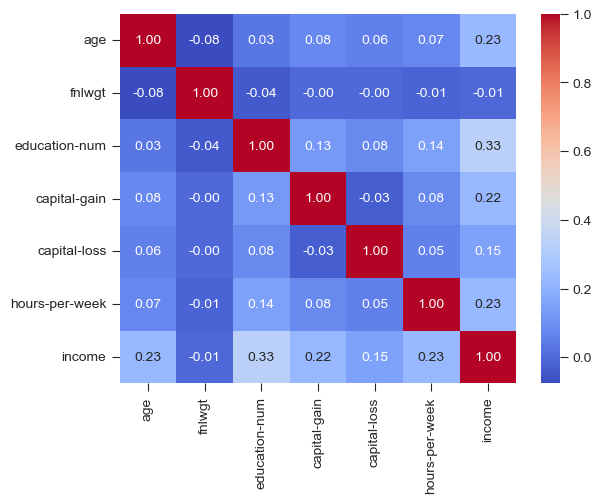

In [2057]:
# Correlation analysis using confusion matrix
numerical_features = data.select_dtypes(include=['int64'])
corr_metrics = numerical_features.corr()
sns.heatmap(corr_metrics, annot=True, fmt='.2f', cmap='coolwarm')

In [2058]:
# Process data in the age column
data['age'].describe()

count    48813.000000
mean        38.647348
std         13.709005
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

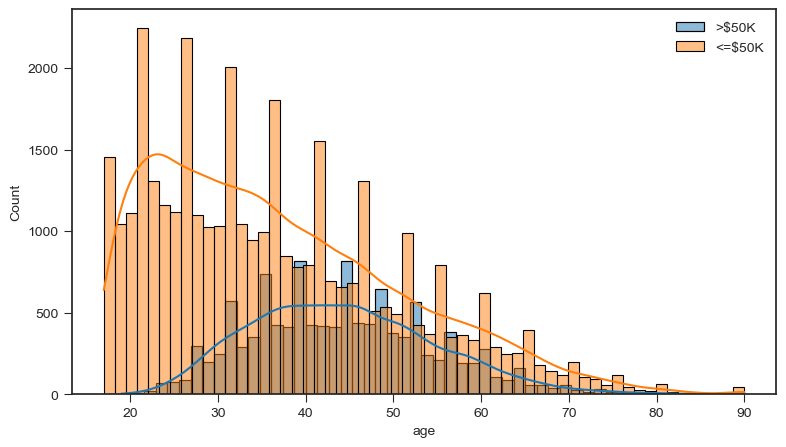

In [2059]:
# Show the relation of the age column and the target variable
plt.style.use('seaborn-v0_8-ticks') 
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 2)
sns.histplot(data[data['income'] == 1]['age'], kde=True, label=">$50K")
sns.histplot(data[data['income'] == 0]['age'], kde=True, label="<=$50K")
plt.legend()

<Axes: xlabel='age'>

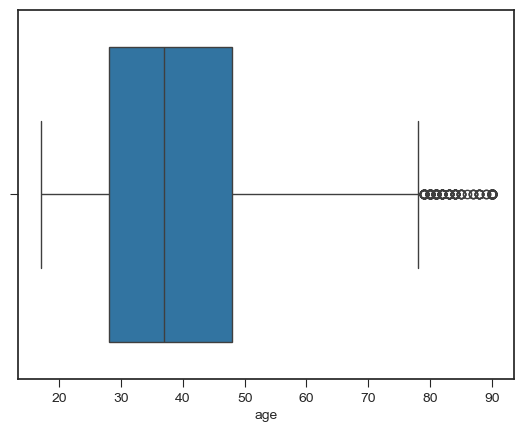

In [2060]:
# Check for outliers
sns.boxplot(x='age', data=data)

In [2061]:
# Calculate 1st Quartile and 3rd quartile
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)

# Calculate IQR 
IQR = Q3 - Q1

# Lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

bounds = (data['age'] < lower_bound) | (data['age'] > upper_bound)

# Replace outlier values with the mean of non-outlier values
data['age'] = np.where(bounds, np.mean(data[~bounds]['age']), data['age'])

<Axes: xlabel='age'>

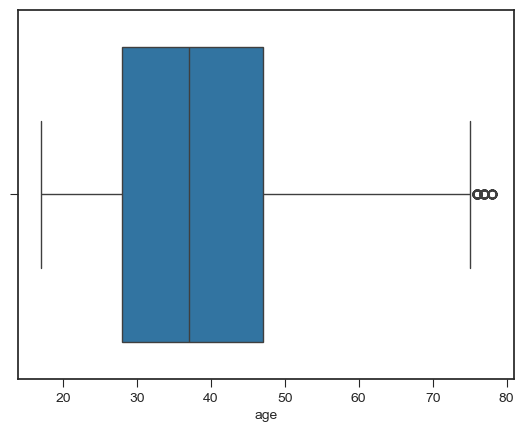

In [2062]:
# Check the handled outliers
sns.boxplot(x='age', data=data)

In [2063]:
# Process data in the workclass column
data['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

<Axes: xlabel='workclass'>

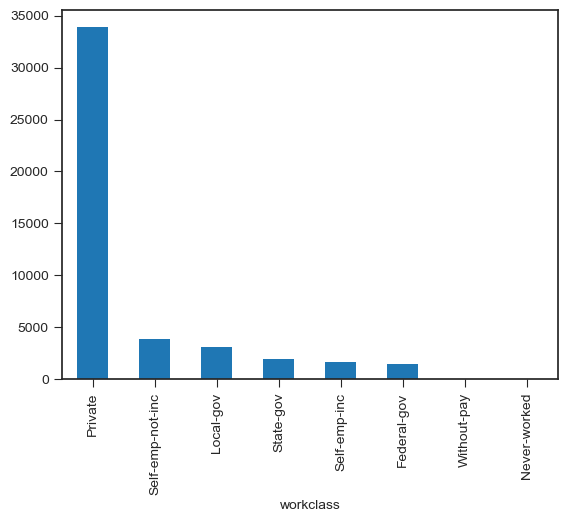

In [2064]:
# Plot the workclass column
data['workclass'].value_counts().plot.bar()

<Axes: xlabel='workclass'>

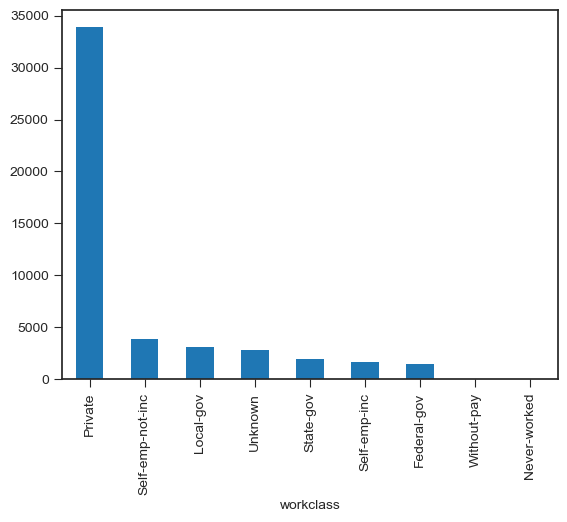

In [2065]:
# Fill the null values
data['workclass'].fillna('Unknown', inplace=True)
data['workclass'].value_counts().plot.bar()

In [2066]:
# Check any incorrect values
counts = data['workclass'].value_counts()
never_worked_count = counts.get('Never-worked',0)
without_pay_count = counts.get('Without-pay', 0)

total = never_worked_count + without_pay_count
print('Total number of people who do not earn an income -',total)

Total number of people who do not earn an income - 31


In [2067]:
# Remove the data that is not related to predict income
data = data[~data['workclass'].isin(['Never-worked', 'Without-pay'])]

In [2068]:
data['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Unknown', 'Self-emp-inc'], dtype=object)

In [2069]:
# Grouping workclass categories
data['workclass'] = data['workclass'].replace({
    'State-gov': 'Government',
    'Federal-gov': 'Government',
    'Local-gov': 'Government',
    'Self-emp-not-inc': 'Self-Employed',
    'Self-emp-inc': 'Self-Employed'
})

print(data['workclass'].unique())

['Government' 'Self-Employed' 'Private' 'Unknown']


<Axes: xlabel='workclass'>

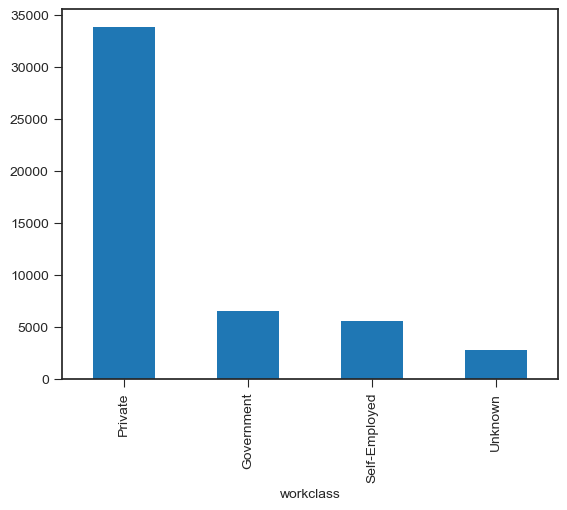

In [2070]:
data['workclass'].value_counts().plot.bar()

In [2071]:
# Check the fnlwgt column
data['fnlwgt'].describe()

count    4.878200e+04
mean     1.896721e+05
std      1.056141e+05
min      1.228500e+04
25%      1.175322e+05
50%      1.781470e+05
75%      2.376420e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64

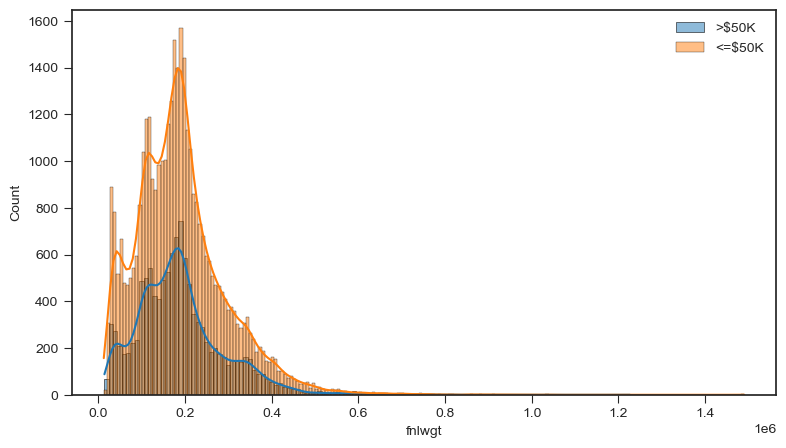

In [2072]:
# Show the relation of the fnlwgt column and the target variable

plt.style.use('seaborn-v0_8-ticks') 
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 2)
sns.histplot(data[data['income'] == 1]['fnlwgt'], kde=True, label=">$50K")
sns.histplot(data[data['income'] == 0]['fnlwgt'], kde=True, label="<=$50K")
plt.legend()

<Axes: xlabel='fnlwgt'>

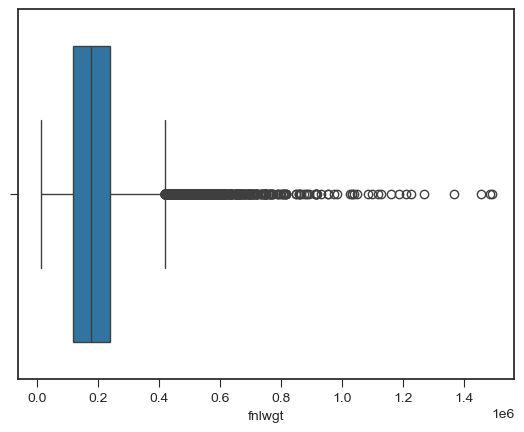

In [2073]:
sns.boxplot(x='fnlwgt', data=data)

<Axes: xlabel='fnlwgt'>

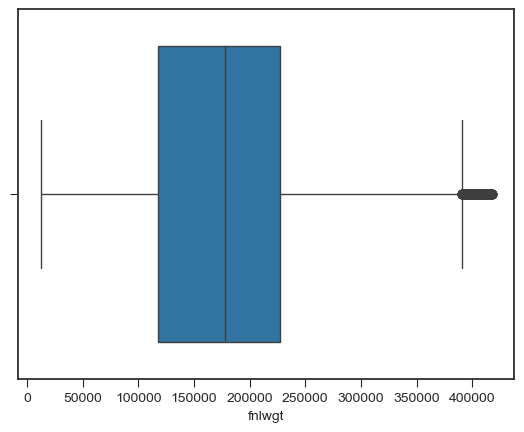

In [2074]:
# Calculate Q1 and Q3
Q1 = data['fnlwgt'].quantile(0.25)
Q3 = data['fnlwgt'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

bounds = (data['fnlwgt'] < lower_bound) | (data['fnlwgt'] > upper_bound)

# Replace outlier values with the mean of non-outlier values
data['fnlwgt'] = np.where(bounds, np.mean(data[~bounds]['fnlwgt']), data['fnlwgt'])

# Get the boxplot
sns.boxplot(x='fnlwgt', data=data)

In [2075]:
# Check the education column
data['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [2076]:
data['education'].value_counts()

education
HS-grad         15761
Some-college    10864
Bachelors        8020
Masters          2656
Assoc-voc        2060
11th             1809
Assoc-acdm       1599
10th             1387
7th-8th           951
Prof-school       834
9th               756
12th              656
Doctorate         594
5th-6th           508
1st-4th           245
Preschool          82
Name: count, dtype: int64

<Axes: xlabel='education'>

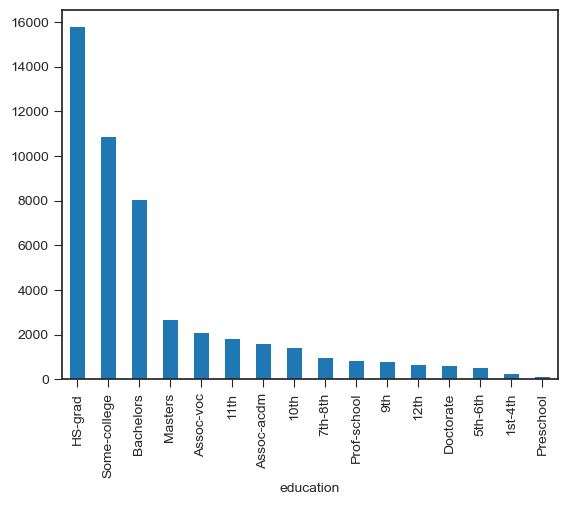

In [2077]:
data['education'].value_counts().plot.bar()

In [2078]:
data['education-num'].describe()

count    48782.000000
mean        10.079702
std          2.570281
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education-num, dtype: float64

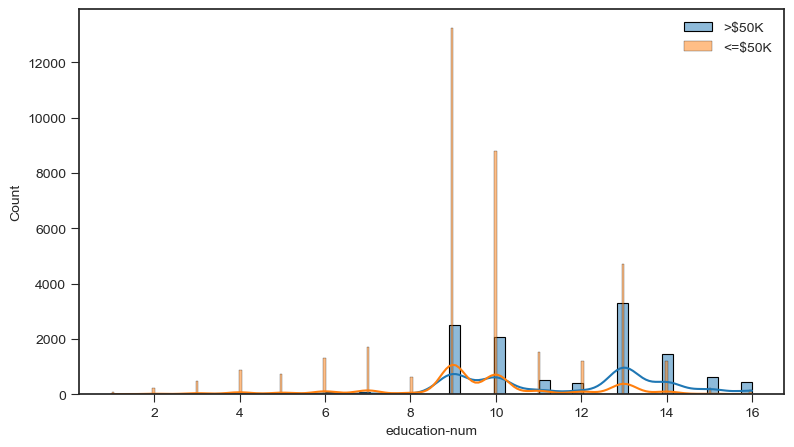

In [2079]:
# Show the relation of the education-num column and the target variable

plt.style.use('seaborn-v0_8-ticks') 
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 2)
sns.histplot(data[data['income'] == 1]['education-num'], kde=True, label=">$50K")
sns.histplot(data[data['income'] == 0]['education-num'], kde=True, label="<=$50K")
plt.legend()

<Axes: xlabel='education-num'>

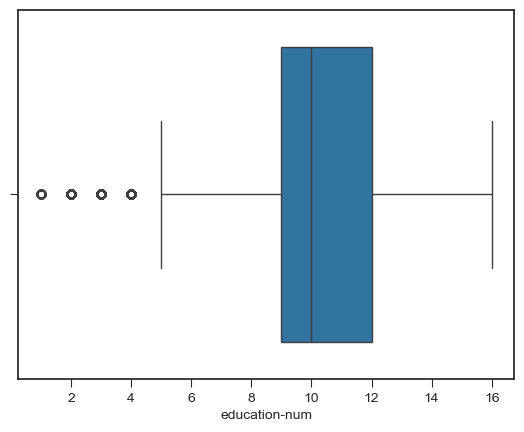

In [2080]:
# Boxplot for education-num column
sns.boxplot(x='education-num', data=data)

<Axes: xlabel='education-num'>

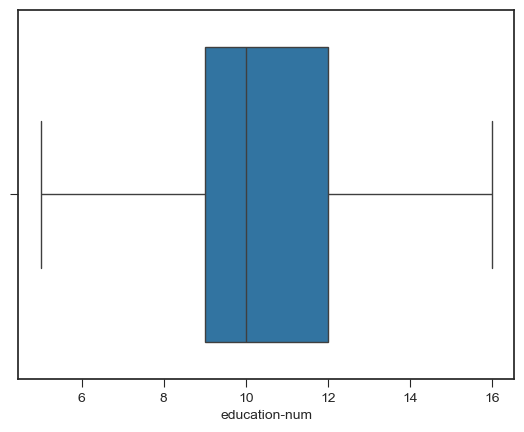

In [2081]:
# Calculate Q1 and Q3
Q1 = data['education-num'].quantile(0.25)
Q3 = data['education-num'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

bounds = (data['education-num'] < lower_bound) | (data['education-num'] > upper_bound)

# Replace outlier values with the mean of non-outlier values
data['education-num'] = np.where(bounds, np.mean(data[~bounds]['education-num']), data['education-num'])

# Boxplot after removing outliers
sns.boxplot(x='education-num', data=data)

In [2082]:
# Check the marital-status column
data['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

<Axes: xlabel='marital-status'>

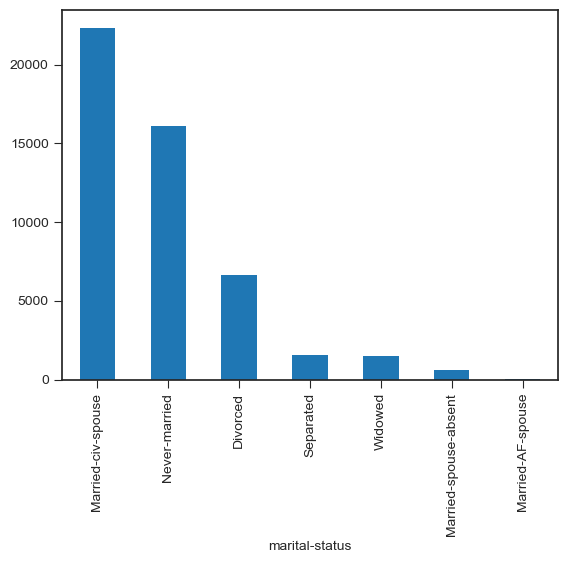

In [2083]:
# Check the marital-status column
data['marital-status'].value_counts().plot.bar()

In [2084]:
# Check the occupation column
data['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', nan, 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

<Axes: xlabel='occupation'>

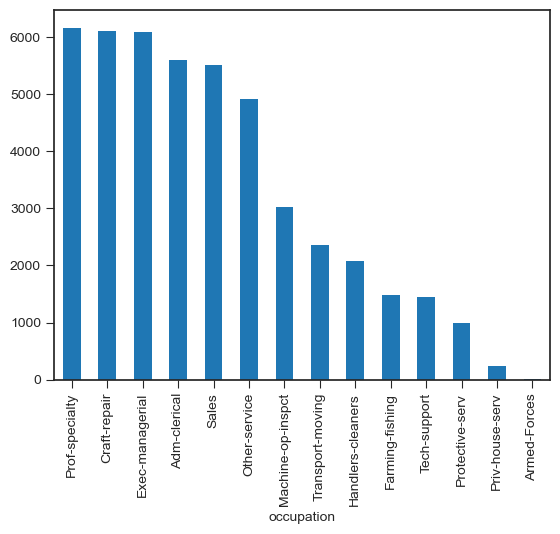

In [2085]:
data['occupation'].value_counts().plot.bar()

<Axes: xlabel='occupation'>

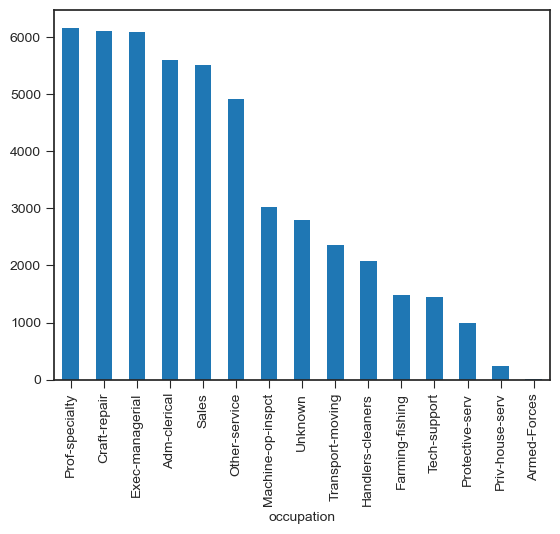

In [2086]:
# Fill the null values
data['occupation'].fillna('Unknown', inplace=True)
data['occupation'].value_counts().plot.bar()

In [2087]:
# Check the relationship column
data['relationship'].unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

<Axes: xlabel='relationship'>

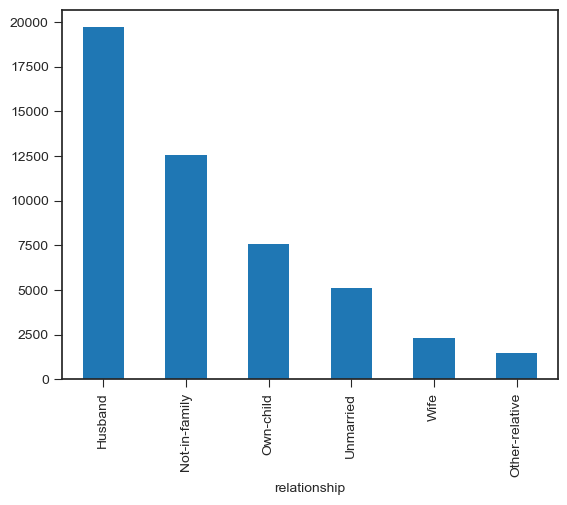

In [2088]:
data['relationship'].value_counts().plot.bar()

In [2089]:
# Check the race column
data['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

<Axes: xlabel='race'>

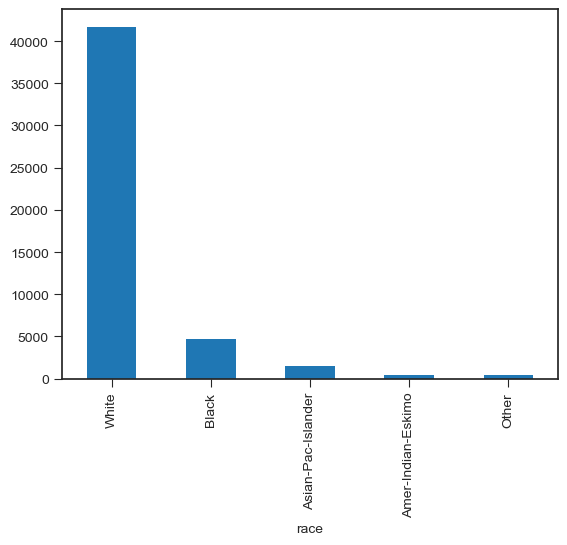

In [2090]:
data['race'].value_counts().plot.bar()

In [2091]:
# Check the sex column
data['sex'].unique()

array(['Male', 'Female'], dtype=object)

<Axes: xlabel='sex'>

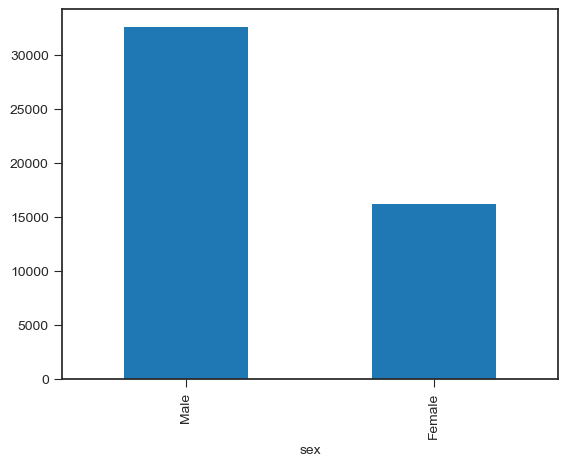

In [2092]:
data['sex'].value_counts().plot.bar()

In [2093]:
# Check the capital-gain column
data['capital-gain'].describe()

count    48782.000000
mean      1080.254828
std       7456.489908
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

In [2094]:
data['capital-gain'].unique()

array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
       34095,  4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,
        2176,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060,  1264,  7262,  1731,  6612], dtype=int64)

<Axes: xlabel='capital-gain'>

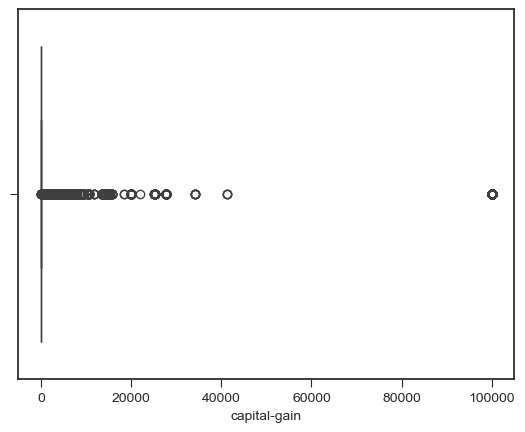

In [2095]:
# Get the boxplot
sns.boxplot(x='capital-gain', data=data)

<Axes: xlabel='capital-gain'>

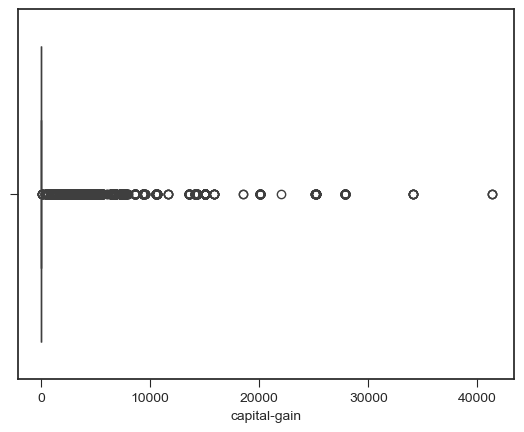

In [2096]:
# Handle the outliers
filtered_data = data['capital-gain'] > 80000
data['capital-gain'] = np.where(filtered_data, np.mean(data[~filtered_data]['capital-gain']), data['capital-gain'])

# Boxplot after handling outliers
sns.boxplot(x='capital-gain', data=data)

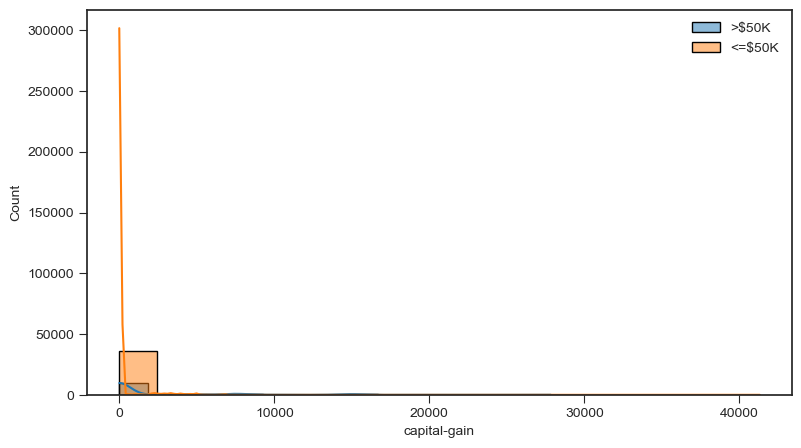

In [2097]:
# Show the relation of the capital-gain column and the target variable

plt.style.use('seaborn-v0_8-ticks') 
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 2)
sns.histplot(data[data['income'] == 1]['capital-gain'], kde=True, label=">$50K")
sns.histplot(data[data['income'] == 0]['capital-gain'], kde=True, label="<=$50K")
plt.legend()

In [2098]:
# Check the capital-loss column
data['capital-loss'].describe()

count    48782.000000
mean        87.571256
std        403.158513
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64

<Axes: xlabel='capital-loss'>

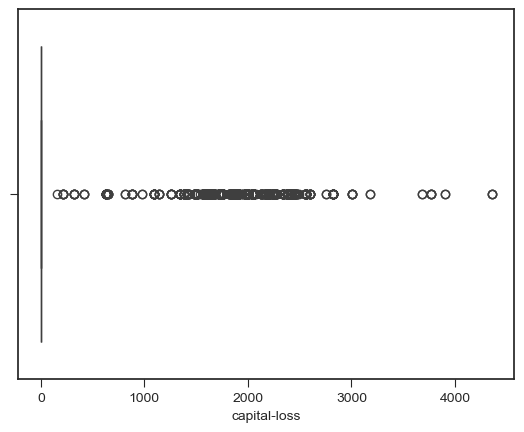

In [2099]:
# Boxplot 
sns.boxplot(x='capital-loss', data=data)

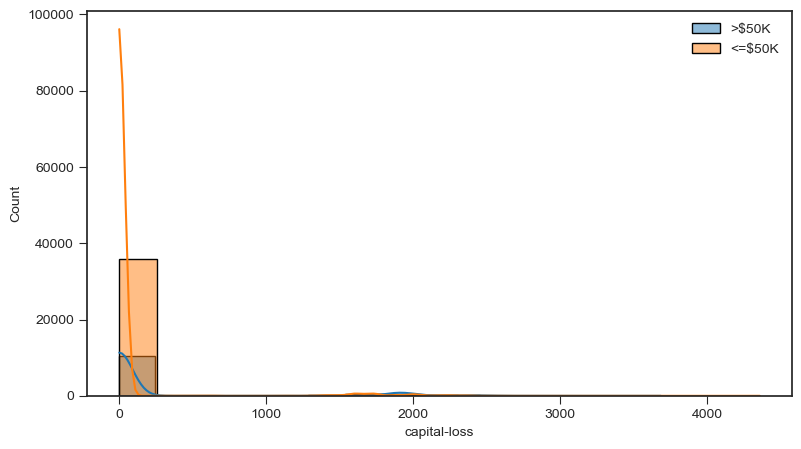

In [2100]:
# Show the relation of the capital-loss column and the target variable

plt.style.use('seaborn-v0_8-ticks') 
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 2)
sns.histplot(data[data['income'] == 1]['capital-loss'], kde=True, label=">$50K")
sns.histplot(data[data['income'] == 0]['capital-loss'], kde=True, label="<=$50K")
plt.legend()

In [2101]:
# Check the hours-per-week column
data['hours-per-week'].describe()

count    48782.000000
mean        40.430200
std         12.387144
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

<Axes: xlabel='hours-per-week'>

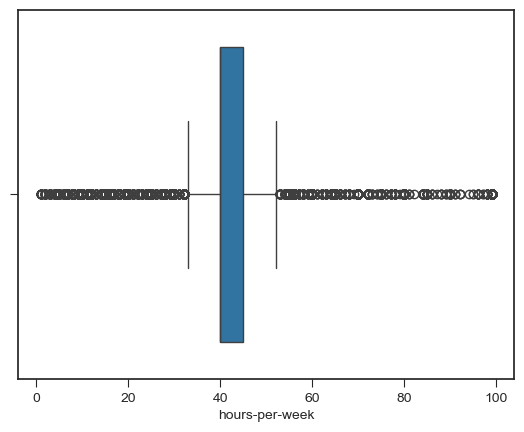

In [2102]:
# Boxplot
sns.boxplot(x='hours-per-week', data=data)

<Axes: xlabel='hours-per-week'>

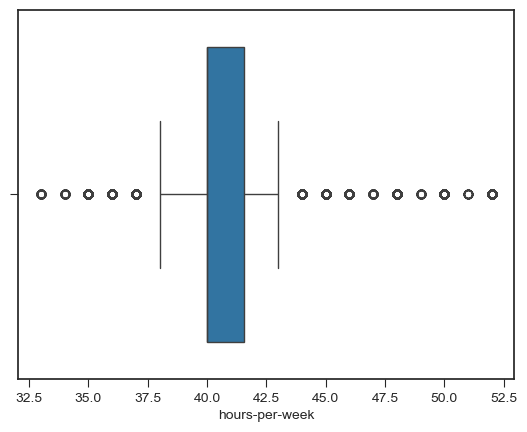

In [2103]:
# Calculate Q1 and Q3
Q1 = data['hours-per-week'].quantile(0.25)
Q3 = data['hours-per-week'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

bounds = (data['hours-per-week'] < lower_bound) | (data['hours-per-week'] > upper_bound)

# Replace outlier values with the mean of non-outlier values
data['hours-per-week'] = np.where(bounds, np.mean(data[~bounds]['hours-per-week']), data['hours-per-week'])

sns.boxplot(x='hours-per-week', data=data)

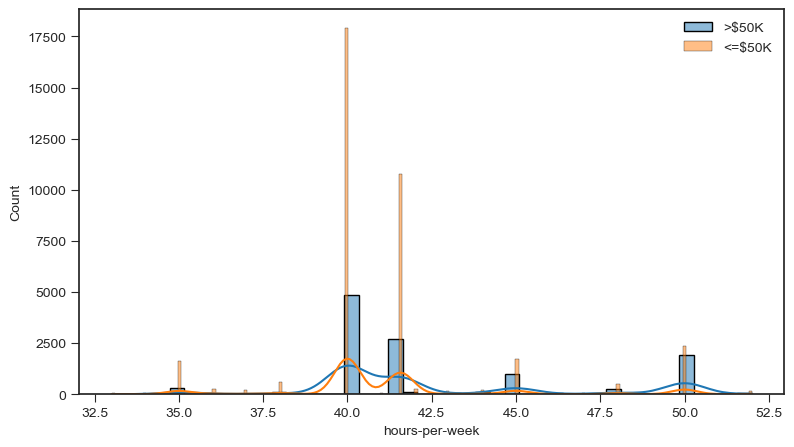

In [2104]:
# Show the relation of the hours-per-week column and the target variable

plt.style.use('seaborn-v0_8-ticks') 
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 2)
sns.histplot(data[data['income'] == 1]['hours-per-week'], kde=True, label=">$50K")
sns.histplot(data[data['income'] == 0]['hours-per-week'], kde=True, label="<=$50K")
plt.legend()

In [2105]:
# Check the native-country column
data['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', nan, 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

<Axes: xlabel='native-country'>

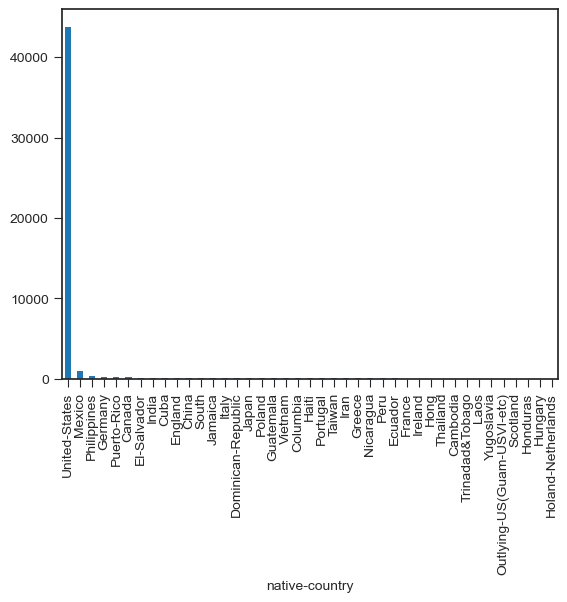

In [2106]:
data['native-country'].value_counts().plot.bar()

<Axes: xlabel='native-country'>

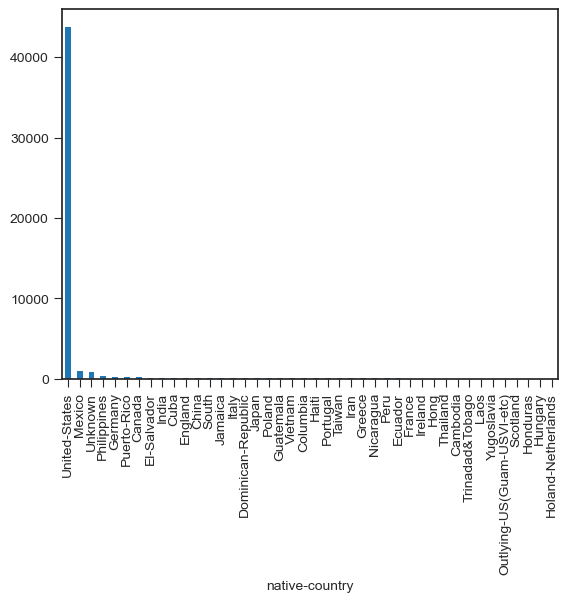

In [2107]:
# Fill the null values
data['native-country'].fillna('Unknown', inplace=True)
data['native-country'].value_counts().plot.bar()

In [2108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48782 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48782 non-null  float64
 1   workclass       48782 non-null  object 
 2   fnlwgt          48782 non-null  float64
 3   education       48782 non-null  object 
 4   education-num   48782 non-null  float64
 5   marital-status  48782 non-null  object 
 6   occupation      48782 non-null  object 
 7   relationship    48782 non-null  object 
 8   race            48782 non-null  object 
 9   sex             48782 non-null  object 
 10  capital-gain    48782 non-null  float64
 11  capital-loss    48782 non-null  int64  
 12  hours-per-week  48782 non-null  float64
 13  native-country  48782 non-null  object 
 14  income          48782 non-null  int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 6.0+ MB


Correlation analysis

<Axes: >

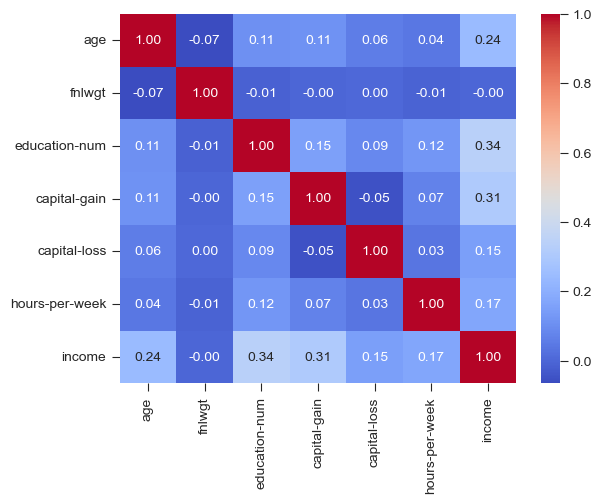

In [2109]:
# HeatMap for correlation analysis
numerical_features = data.select_dtypes(include=['int64','float64'])
corr_metrics = numerical_features.corr()
sns.heatmap(corr_metrics, annot=True, fmt='.2f', cmap='coolwarm')

# PCA (Principal Component Analysis)

In [2110]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2111]:
# Less correlated columns
filter = data[['fnlwgt','hours-per-week', 'capital-loss']]

# Z-score Normalization
scaler = StandardScaler()
filter_scaled = scaler.fit_transform(filter)

# Principal Component Analysis
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(filter_scaled)

In [2112]:
# Remove the columns that were used for PCA
X = data.drop(columns=['income','fnlwgt','hours-per-week', 'capital-loss'], axis=1)

# Create a new column
X['PCA'] = principalComponents

# One Hot Encoding

In [2113]:
# Seperate the features and target variable
X = pd.get_dummies(X) #One hot encoding
y = data['income']

# Oversampling

In [2114]:
from imblearn.over_sampling import SMOTE

In [2115]:
# Oversampling for class imbalance
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Amount of data after oversampling
y.value_counts()

income
0    37099
1    37099
Name: count, dtype: int64

In [2116]:
X.isnull().sum()

age                               0
education-num                     0
capital-gain                      0
PCA                               0
workclass_Government              0
                                 ..
native-country_Trinadad&Tobago    0
native-country_United-States      0
native-country_Unknown            0
native-country_Vietnam            0
native-country_Yugoslavia         0
Length: 101, dtype: int64

# Split dataset to train and test

In [2117]:
from sklearn.model_selection import train_test_split

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Naive Bayes Classifier

In [2118]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Naive Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predictions
nb_predictions = nb_classifier.predict(X_test)

# Evaluation metrics
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_report = classification_report(y_test, nb_predictions)

# Print results
print("Naive Bayes Classifier Accuracy:", nb_accuracy)
print("\nNaive Bayes Classification Report:\n", nb_report)

Naive Bayes Classifier Accuracy: 0.8105570530098832

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.74      0.80     11176
           1       0.77      0.88      0.82     11084

    accuracy                           0.81     22260
   macro avg       0.82      0.81      0.81     22260
weighted avg       0.82      0.81      0.81     22260



Confusion Matrix

In [2119]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix
nb_conf_matrix = confusion_matrix(y_test, nb_predictions)

<Axes: >

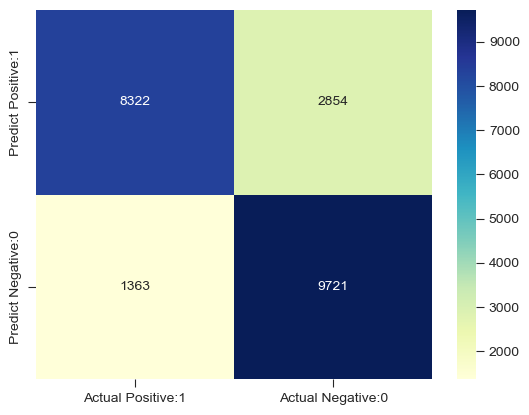

In [2120]:
# Visual representation
nb_conf_matrix = pd.DataFrame(data=nb_conf_matrix, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(nb_conf_matrix, annot=True, fmt='d', cmap='YlGnBu')

ROC-AUC

In [2121]:
from sklearn.metrics import roc_curve, roc_auc_score

# Receiver Operating Characteristic – Area Under the Curve
y_pred_prob = nb_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label = 1)

# ROC-AUC accuracy score
roc_auc = roc_auc_score(y_test, y_pred_prob) 
print('Cross-validation scores: '+ str(roc_auc))

Cross-validation scores: 0.8962257443774837


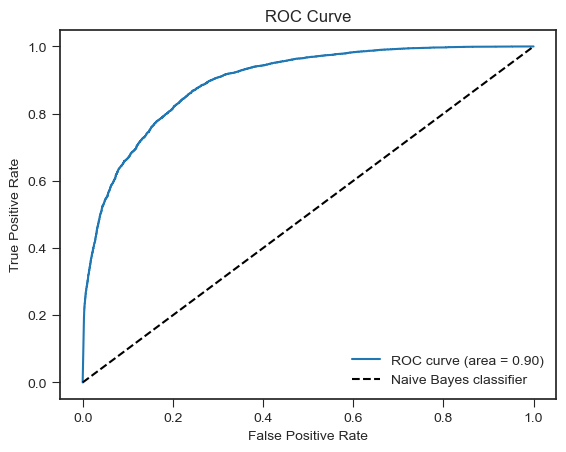

In [2122]:
# Plot the ROC-AUC
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], 'k--', label='Naive Bayes classifier') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve') 
plt.legend(loc="lower right") 
plt.show()

Cross Validation

In [2123]:
from sklearn.model_selection import cross_val_score

# Cross Validation
scores_nb = cross_val_score(nb_classifier, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores_nb))

Cross-validation scores:[0.82210243 0.81882942 0.81363111 0.8122834  0.81767424 0.8070851
 0.81401617 0.82113978 0.81378779 0.81706143]


In [2124]:
# Cross Validation Score
print('Average cross-validation score: {:.4f}'.format(scores_nb.mean()))

Average cross-validation score: 0.8158


## Random Forest Classifier

In [2125]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf_classifier = RandomForestClassifier(max_depth=None,min_samples_leaf=1,min_samples_split=2,n_estimators=100,max_features='auto')
rf_classifier.fit(X_train, y_train)

# Predictions
rf_predictions = rf_classifier.predict(X_test)

# Evaluation Metrics
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_report = classification_report(y_test, rf_predictions)

# Print results
print("Random Forest Classifier Accuracy:", rf_accuracy)
print("\nRandom Forest Classification Report:\n", rf_report)

Random Forest Classifier Accuracy: 0.8894429469901168

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89     11176
           1       0.88      0.90      0.89     11084

    accuracy                           0.89     22260
   macro avg       0.89      0.89      0.89     22260
weighted avg       0.89      0.89      0.89     22260



Confusion Matrix

In [2126]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)

<Axes: >

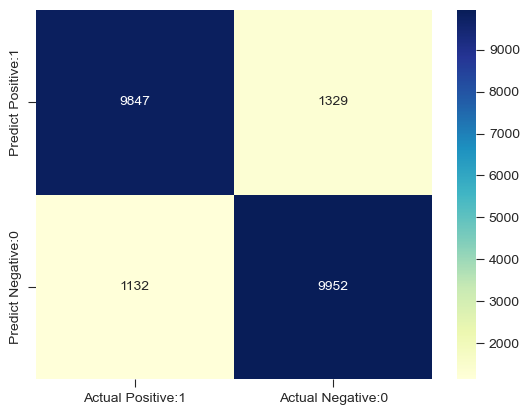

In [2127]:
# Visual representation of confusion matrix
rf_conf_matrix = pd.DataFrame(data=rf_conf_matrix, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='YlGnBu')

ROC-AUC

In [2128]:
from sklearn.metrics import roc_curve, roc_auc_score

# Receiver Operating Characteristic – Area Under the Curve
y_pred_prob = rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label = 1)

# ROC-AUC accuracy score
roc_auc = roc_auc_score(y_test, y_pred_prob) 
print('Cross-validation scores: '+ str(roc_auc))

Cross-validation scores: 0.9547861492133862


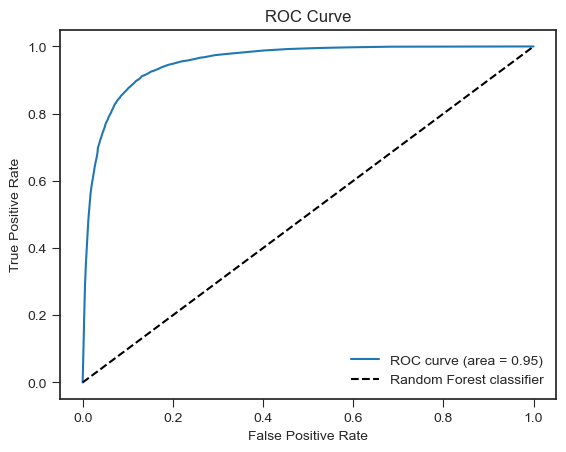

In [2129]:
# Plot the ROC-AUC
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], 'k--', label='Random Forest classifier') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve') 
plt.legend(loc="lower right") 
plt.show()

Cross validation

In [2130]:
from sklearn.model_selection import cross_val_score

# Cross Validation
scores = cross_val_score(rf_classifier, X_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.88852522 0.88929534 0.88698498 0.88448209 0.88852522 0.87832114
 0.88294186 0.88428956 0.88580782 0.88888889]


In [2131]:
# Cross Validation Score
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8858
